# Daniel Enrique Patiño Jaimes

## Utilizar la base de datos de diabetes proporcionada para este examen realizar

Librerías

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

Cargar el dataset

In [81]:
data = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')
columnas = ['resultado']
for i in range(1,22,1):
  columnas.append("c"+str(i))
data.columns=columnas
data = data.dropna()
data

,resultado,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,c12,c13,c14,c15,c16,c17,c18,c19,c20,c21
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


## 1. Realizar gráficas de dispersión entre variables para entender un poco la relación entre ellas

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:512: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


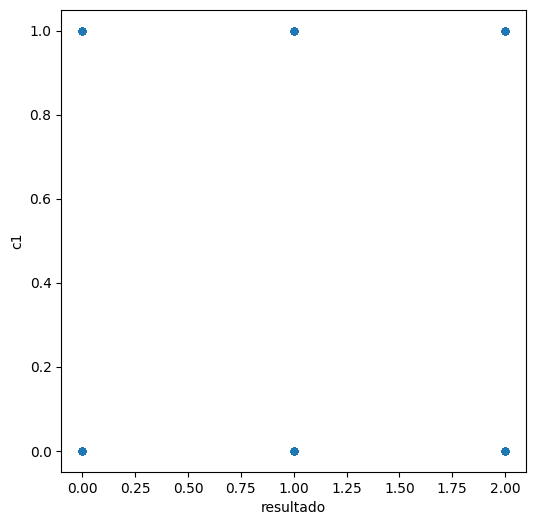

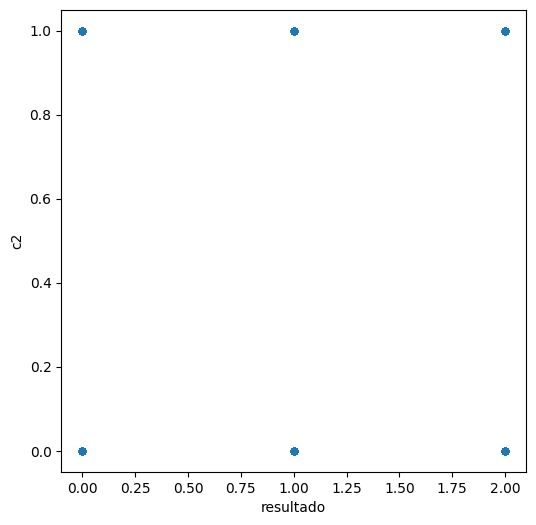

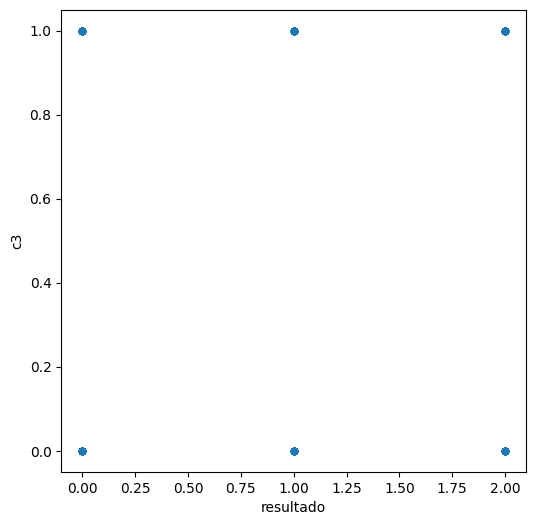

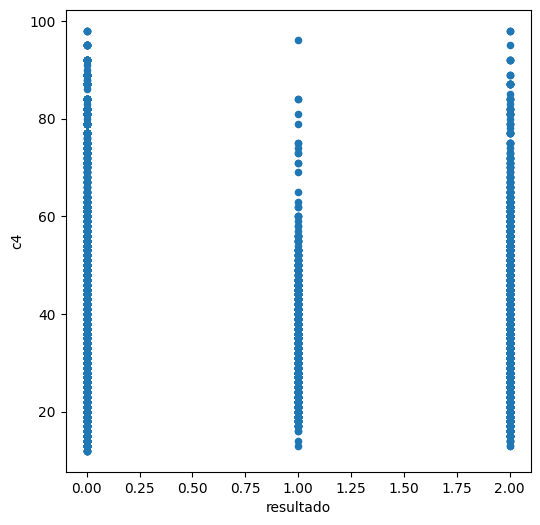

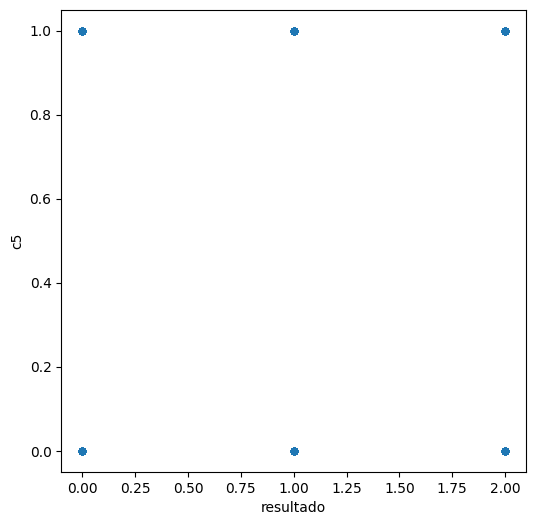

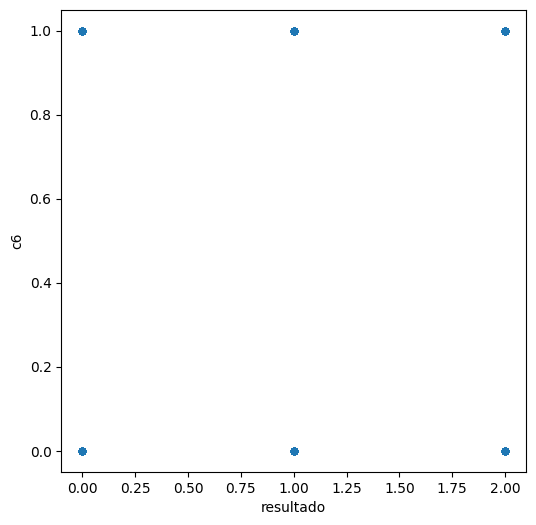

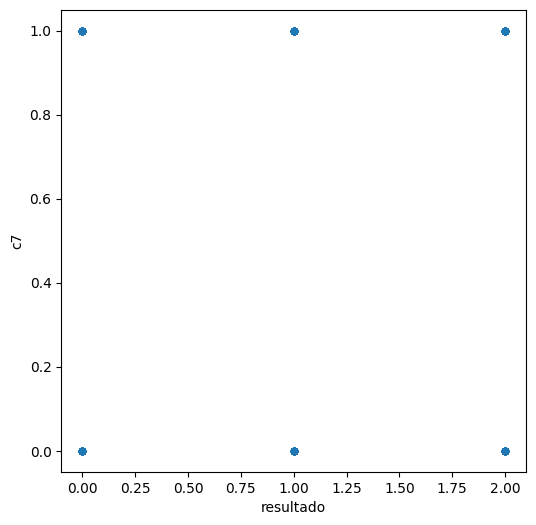

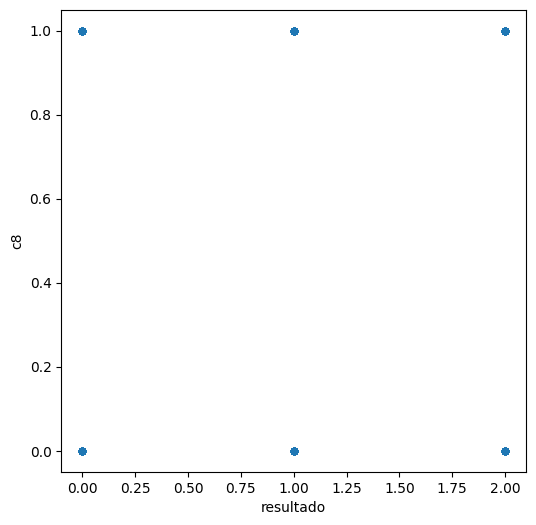

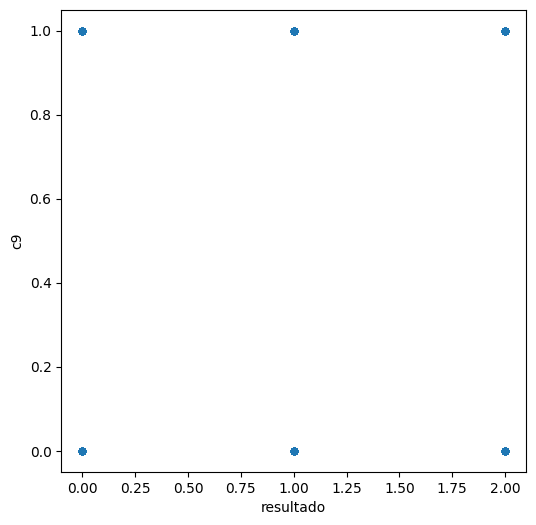

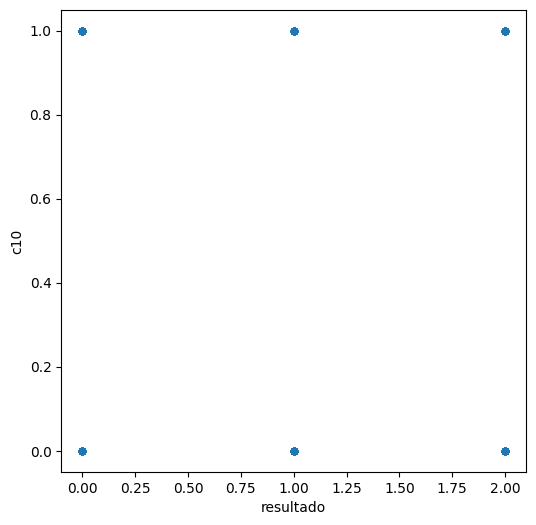

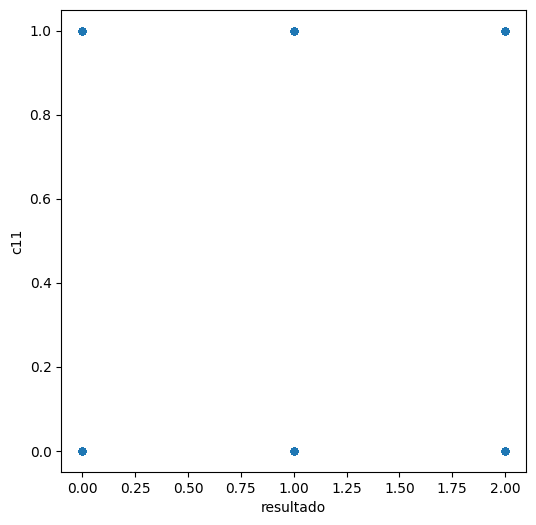

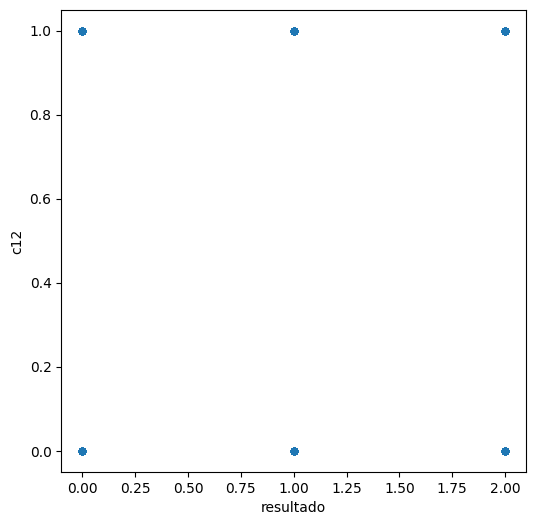

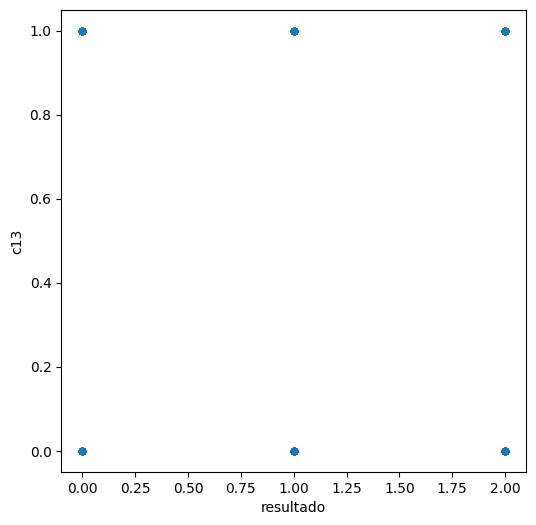

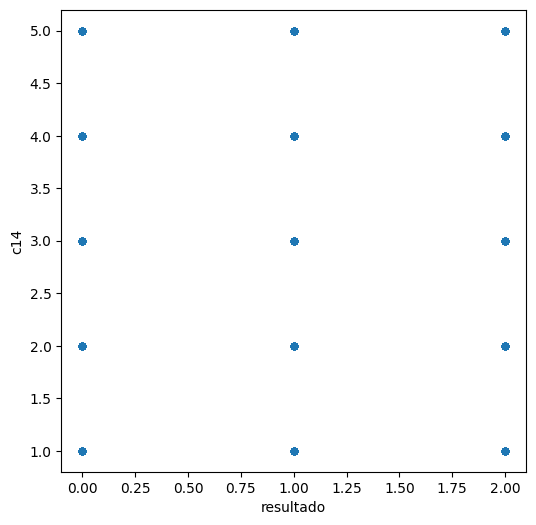

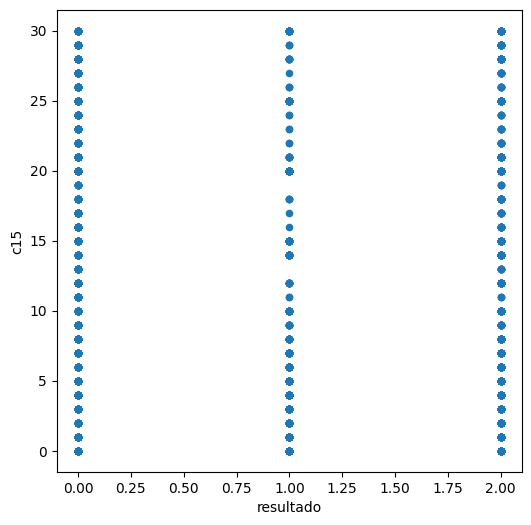

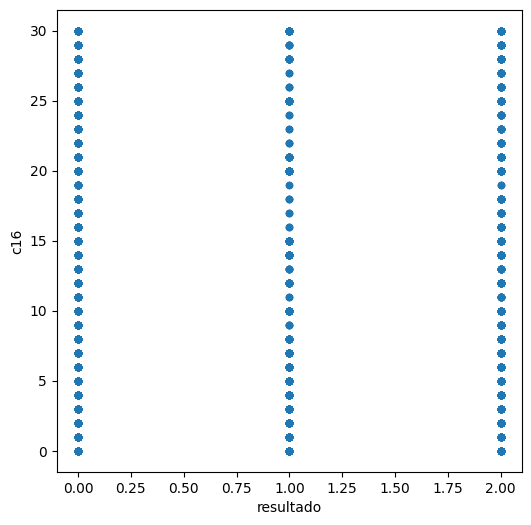

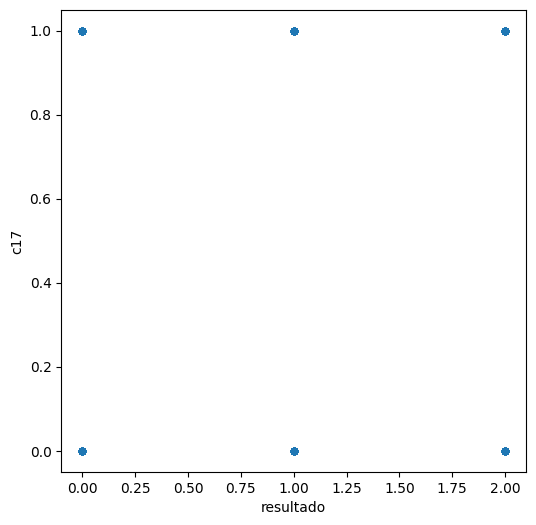

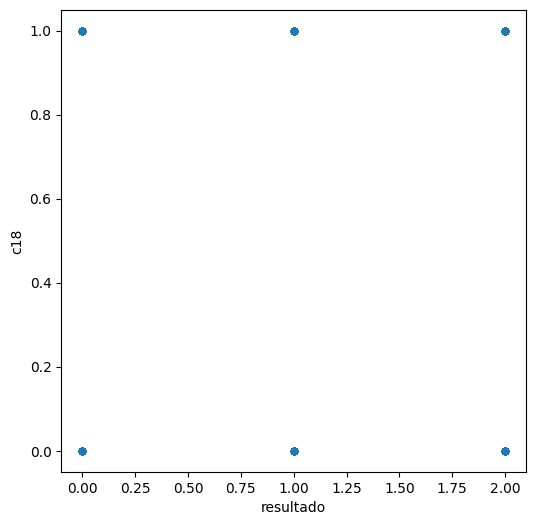

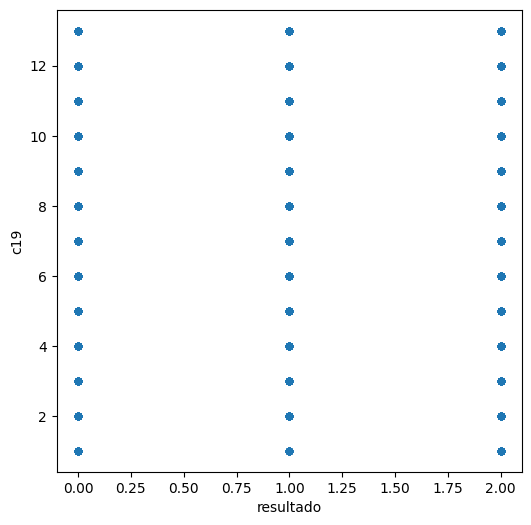

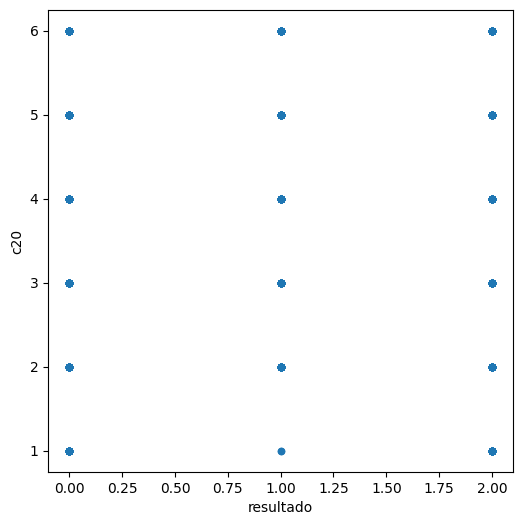

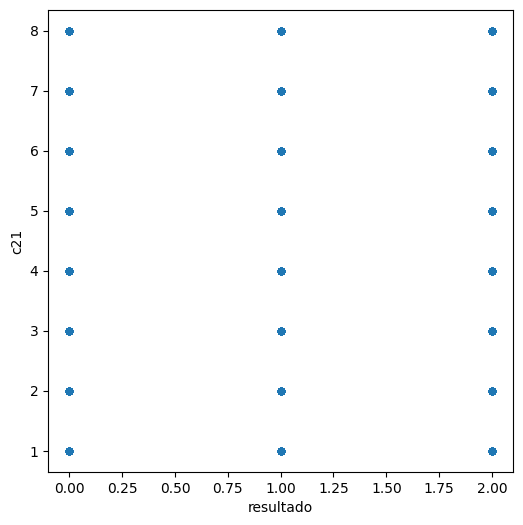

In [82]:
for i in columnas[1:]:
  data.plot(kind='scatter',x =columnas[0],y=i,figsize=(6,6))

## 2. Calcular la matriz de correlación del conjunto de datos original

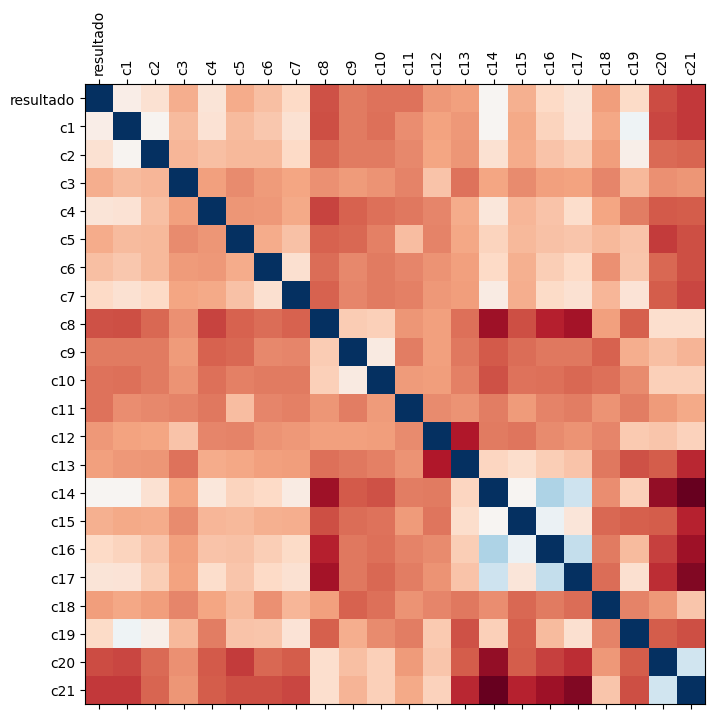

In [83]:
corr = data.corr()

fig = plt.figure(figsize=(8,8))
plt.matshow(corr,cmap = 'RdBu' ,fignum=fig.number)
plt.xticks(range(len(corr.columns)),corr.columns,rotation='vertical');
plt.yticks(range(len(corr.columns)),corr.columns);

In [84]:
corr_matrix = data.corr()
corr_values = corr_matrix['resultado'].sort_values(ascending=False)
print(corr_values)

resultado    1.000000
c14          0.302587
c1           0.271596
c4           0.224379
c17          0.224239
c2           0.209085
c19          0.185026
c7           0.180272
c16          0.176287
c6           0.107179
c15          0.073507
c3           0.067546
c5           0.062914
c13          0.035436
c18          0.031040
c12          0.015410
c9          -0.042192
c11         -0.057882
c10         -0.058972
c8          -0.121947
c20         -0.130517
c21         -0.171483
Name: resultado, dtype: float64


## 3. Estadísticos de cada columna como lo son la media, mediana, moda, kurtosis y asimetría. Mencionar en base de estos datos si dicha variable o columna tiene tendencia de ser una distribución normal o no

In [147]:
# Calcular la media de cada columna
media = data.mean()

# Calcular la mediana de cada columna
mediana = data.median()

# Calcular la moda de cada columna
moda = data.mode().iloc[0]

# Calcular la kurtosis de cada columna
kurtosis = data.kurtosis()

# Calcular la asimetría de cada columna
asimetria = data.skew()

# Imprimir los resultados
print("Media:")
print(media)
print("\nMediana:")
print(mediana)
print("\nModa:")
print(moda)
print("\nKurtosis:")
print(kurtosis)
print("\nAsimetría:")
print(asimetria)

# Determinar si una columna tiene tendencia de ser una distribución normal
for columna in data.columns:
    if abs(asimetria[columna]) < 0.5 and abs(kurtosis[columna]) < 0.5:
        print(f"La columna {columna} tiene tendencia a seguir una distribución normal.")
    else:
        print(f"La columna {columna} no tiene tendencia a seguir una distribución normal.")

Media:
resultado     0.296921
c1            0.429001
c2            0.424121
c3            0.962670
c4           28.382364
c5            0.443169
c6            0.040571
c7            0.094186
c8            0.756544
c9            0.634256
c10           0.811420
c11           0.056197
c12           0.951053
c13           0.084177
c14           2.511392
c15           3.184772
c16           4.242081
c17           0.168224
c18           0.440342
c19           8.032119
c20           5.050434
c21           6.053875
dtype: float64

Mediana:
resultado     0.0
c1            0.0
c2            0.0
c3            1.0
c4           27.0
c5            0.0
c6            0.0
c7            0.0
c8            1.0
c9            1.0
c10           1.0
c11           0.0
c12           1.0
c13           0.0
c14           2.0
c15           0.0
c16           0.0
c17           0.0
c18           0.0
c19           8.0
c20           5.0
c21           7.0
dtype: float64

Moda:
resultado     0.0
c1            0.0
c2      

## 4. Generar dos datasets, uno con valores atípicos y otro sin ellos. Los dos se utilizarán para entrenar modelos

### Dataset con atípicos

In [86]:
data_con = pd.DataFrame()
for i in columnas[2:]:
  Q1 = data[i].quantile(0.25)
  Q3 = data[i].quantile(0.75)
  IQR = Q3 - Q1
  u_limit_h = Q3 + 1.55 * IQR
  l_limit_h = Q1 - 1.55 * IQR
  atp = (data[i] < l_limit_h) | (data[i] > u_limit_h) # Registro con dato atípico
  data_con = pd.concat([data_con,data[atp]],ignore_index=True) # Se guarda el registro
  
data_con=data_con.drop_duplicates() # Se eliminan registros repetidos
print('Existen',data_con.shape[0],'registros con datos atípicos')

Existen 157537 registros con datos atípicos


### Dataset sin atípicos

In [87]:
data_sin = data
for i in columnas[1:]:
  Q1 = data[i].quantile(0.25)
  Q3 = data[i].quantile(0.75)
  IQR = Q3 - Q1
  u_limit = Q3 + 1.5 * IQR
  l_limit = Q1 - 1.5 * IQR
  atp = data_sin[(data_sin[i] < l_limit) | (data_sin[i] > u_limit)].index
  data_sin = data_sin.drop(atp) # Nuevo data set sin los datos atípicos

print('Existen',data_sin.shape[0],'registros sin datos atípicos')

Existen 94210 registros sin datos atípicos


## 5. Calcular la matriz de correlación del conjunto sin atípicos

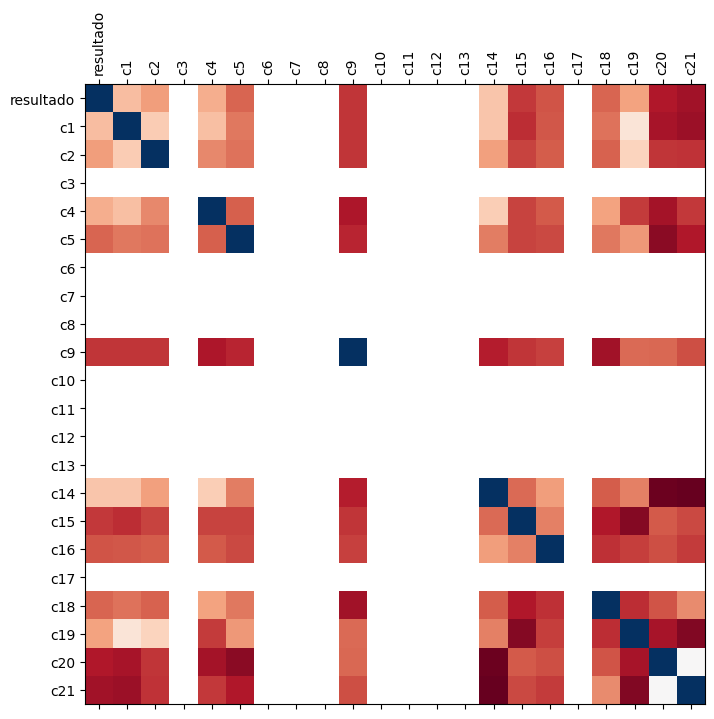

In [88]:
corr = data_sin.corr()

fig = plt.figure(figsize=(8,8))
plt.matshow(corr,cmap = 'RdBu' ,fignum=fig.number)
plt.xticks(range(len(corr.columns)),corr.columns,rotation='vertical');
plt.yticks(range(len(corr.columns)),corr.columns);

In [89]:
corr_matrix = data_sin.corr()
corr_values = corr_matrix['resultado'].sort_values(ascending=False)
print(corr_values)

resultado    1.000000
c14          0.234040
c1           0.214184
c4           0.182764
c19          0.156633
c2           0.150992
c5           0.053007
c18          0.051926
c16          0.022220
c15         -0.024032
c9          -0.030406
c20         -0.082303
c21         -0.101592
c3                NaN
c6                NaN
c7                NaN
c8                NaN
c10               NaN
c11               NaN
c12               NaN
c13               NaN
c17               NaN
Name: resultado, dtype: float64


## 6. Los modelos por entrenar tienen que ser validados por medio de una validación cruzada con K igual a 7,9 y 11. SE DEBE GARANTIZAR LA HOMOGENEIDAD DE LOS DATOS AL MOMENTO DE REALIZAR LA VALIDACIÓN CRUZADA

In [90]:
def homogeneidad(resultados, k):
    # DataFrame para almacenar los datos
    data_cruzada = pd.DataFrame()
    
    # Separación en grupos según la categoría
    grupos = resultados.groupby('resultado')
    diabetes_0 = grupos.get_group(0)
    diabetes_1 = grupos.get_group(1)
    diabetes_2 = grupos.get_group(2)

    # Cantidad de registros por grupo
    diab0 = math.floor(diabetes_0.shape[0] / k)
    diab1 = math.floor(diabetes_1.shape[0] / k)
    diab2 = math.floor(diabetes_2.shape[0] / k)

    # Se agregan los datos al dataframe
    for i in range(0, k):
        data_combinada = pd.DataFrame()
        data_combinada = pd.concat([data_combinada, diabetes_0[i * diab0:i * diab0 + diab0]], ignore_index=True)
        data_combinada = pd.concat([data_combinada, diabetes_1[i * diab1:i * diab1 + diab1]], ignore_index=True)
        data_combinada = pd.concat([data_combinada, diabetes_2[i * diab2:i * diab2 + diab2]], ignore_index=True)
        # Mezclar las filas del DataFrame
        data_combinada = data_combinada.sample(frac=1).reset_index(drop=True)
        # Agregar datos combinados al DataFrame final
        data_cruzada = pd.concat([data_cruzada, data_combinada])
    
    # Se agregan posibles datos faltantes
    data_combinada = pd.DataFrame()
    data_combinada = pd.concat([data_combinada, diabetes_0[k * diab0:]], ignore_index=True)
    data_combinada = pd.concat([data_combinada, diabetes_1[k * diab1:]], ignore_index=True)
    data_combinada = pd.concat([data_combinada, diabetes_2[k * diab2:]], ignore_index=True)
    data_combinada = data_combinada.sample(frac=1).reset_index(drop=True)
    data_cruzada = pd.concat([data_cruzada, data_combinada])
    data_cruzada = data_cruzada.dropna()
    return data_cruzada


## 7. Se debe imprimir la matriz de confusión por cada validación del numeral anterior


In [91]:
def confusion_matrix(y_true, y_pred):
    classes = ['No diabetes','Pre diabetes','Diabetes']
    num_classes = len(classes)
    matrix = np.zeros((num_classes, num_classes), dtype=int)
    
    for i in range(len(y_true)):
        true_class = int(y_true[i])
        pred_class = int(y_pred[i])
        matrix[true_class][pred_class] += 1
    
    confusion = pd.DataFrame(matrix, index=classes, columns=classes)

    return confusion

## 8. Calcular el desempeño de cada modelo usando sensibilidad, precisión y especificidad

In [92]:
def desempeno(confusion):
    classes = ['No diabetes','Pre diabetes','Diabetes']
    num_classes = len(classes)
    desempeno_matrix = np.zeros((3, num_classes))
    index_desempeno = ['Sensibilidad', 'Precisión', 'Especificidad']

    for i in range(num_classes):
        tp = confusion.iloc[i, i]  # Verdaderos positivos
        fn = np.sum(confusion.iloc[i, :]) - tp  # Falsos negativos
        fp = np.sum(confusion.iloc[:, i]) - tp  # Falsos positivos
        tn = np.sum(confusion.values) - tp - fn - fp  # Verdaderos negativos

        desempeno_matrix[0][i] = tp / (tp + fn) if (tp + fn) != 0 else 0 # Sensibilidad
        desempeno_matrix[1][i] = tp / (tp + fp) if (tp + fp) != 0 else 0 # Precisión
        desempeno_matrix[2][i] = tn / (tn + fp) if (tn + fp) != 0 else 0 # Especificidad

    desempeno = pd.DataFrame(desempeno_matrix, index=index_desempeno, columns=confusion.index)

    # Cálculo del promedio del desempeño
    promedio_desempeno = pd.DataFrame(desempeno.mean(axis=1), columns=['Promedio'])
    desempeno = pd.concat([desempeno, promedio_desempeno], axis=1)

    return desempeno


## 9. Deben realizar al menos 4 modelos por algoritmo utilizado y decidir en base de la curva ROC cual es el mejor

### Algoritmo KNN

In [93]:
def KNN(data_cruzada,caracteristicas,kvecinos,kparticiones):
  sensibilidad = 0
  precision = 0
  especificidad = 0
  # Obtener los valores de entrada (X) y las etiquetas (y) del dataset
  X = data_cruzada.iloc[:, caracteristicas].values
  y = data_cruzada.iloc[:, 0].values

  # Inicializar el objeto KFold con el número de folds (k)
  kf = KFold(n_splits=kparticiones)

  # Listas para almacenar los conjuntos de entrenamiento y prueba
  train_indices = []
  test_indices = []

  # Generar los conjuntos de entrenamiento y prueba usando KFold
  for train_index, test_index in kf.split(X):
      train_indices.append(train_index)
      test_indices.append(test_index)

  # Iterar sobre los k folds
  for fold in range(k):
      print('\nFold ',fold)
      # Obtener los índices de entrenamiento y prueba para el fold actual
      train_index = train_indices[fold]
      test_index = test_indices[fold]

      # Obtener los conjuntos de entrenamiento y prueba para el fold actual
      X_train, y_train = X[train_index], y[train_index]
      X_test, y_test = X[test_index], y[test_index]

      modelo = KNeighborsClassifier(n_neighbors=kvecinos)
      modelo.fit(X_train,y_train)
      y_pred = modelo.predict(X_test)
      matriz = confusion_matrix(y_test,y_pred)
      metricas = desempeno(matriz)
      promedio = metricas['Promedio']
      sensibilidad += promedio[0]
      precision += promedio[1]
      especificidad += promedio[2]
      print(matriz)
      print(metricas)
  return sensibilidad/k, precision/k, especificidad/k

Modelo 1

In [142]:
k = 7
data_cruzada = homogeneidad(data_sin,k)
caracteristicas_1=[14,1,4]
sens0,prec0,espe0 = KNN(data_cruzada,caracteristicas_1,5,k)
print('Promedio sensibilidad: ',sens0)
print('Promedio precisión: ',prec0)
print('Promedio especificidad: ',espe0)


Fold  0
              No diabetes  Pre diabetes  Diabetes
No diabetes         12129             0       112
Pre diabetes          168             0         2
Diabetes              998             0        50
               No diabetes  Pre diabetes  Diabetes  Promedio
Sensibilidad      0.990850           0.0  0.047710  0.346187
Precisión         0.912298           0.0  0.304878  0.405725
Especificidad     0.042693           1.0  0.990815  0.677836

Fold  1
              No diabetes  Pre diabetes  Diabetes
No diabetes         11856             0       385
Pre diabetes          159             0        11
Diabetes              927             0       121
               No diabetes  Pre diabetes  Diabetes  Promedio
Sensibilidad      0.968548           0.0  0.115458  0.361335
Precisión         0.916087           0.0  0.234043  0.383377
Especificidad     0.108374           1.0  0.968093  0.692156

Fold  2
              No diabetes  Pre diabetes  Diabetes
No diabetes         12095          

In [95]:
k = 9
data_cruzada = homogeneidad(data_sin,k)
sens,prec,espe = KNN(data_cruzada,caracteristicas_1,5,k)
print('Promedio sensibilidad: ',sens)
print('Promedio precisión: ',prec)
print('Promedio especificidad: ',espe)


Fold  0
              No diabetes  Pre diabetes  Diabetes
No diabetes          9457             0        64
Pre diabetes          131             0         1
Diabetes              797             0        18
               No diabetes  Pre diabetes  Diabetes  Promedio
Sensibilidad      0.993278           0.0  0.022086  0.338455
Precisión         0.910640           0.0  0.216867  0.375836
Especificidad     0.020063           1.0  0.993266  0.671110

Fold  1
              No diabetes  Pre diabetes  Diabetes
No diabetes          9377             0       144
Pre diabetes          125             0         7
Diabetes              766             0        49
               No diabetes  Pre diabetes  Diabetes  Promedio
Sensibilidad      0.984876           0.0  0.060123  0.348333
Precisión         0.913226           0.0  0.245000  0.386075
Especificidad     0.059134           1.0  0.984357  0.681164

Fold  2
              No diabetes  Pre diabetes  Diabetes
No diabetes          9245          

In [96]:
k = 11
data_cruzada = homogeneidad(data_sin,k)
sens,prec,espe = KNN(data_cruzada,caracteristicas_1,5,k)
print('Promedio sensibilidad: ',sens)
print('Promedio precisión: ',prec)
print('Promedio especificidad: ',espe)


Fold  0
              No diabetes  Pre diabetes  Diabetes
No diabetes          7572             0       218
Pre diabetes          103             0         5
Diabetes              600             0        67
               No diabetes  Pre diabetes  Diabetes  Promedio
Sensibilidad      0.972015           0.0  0.100450  0.357488
Precisión         0.915045           0.0  0.231034  0.382027
Especificidad     0.092903           1.0  0.971765  0.688223

Fold  1
              No diabetes  Pre diabetes  Diabetes
No diabetes          7758             0        32
Pre diabetes          103             0         5
Diabetes              646             0        21
               No diabetes  Pre diabetes  Diabetes  Promedio
Sensibilidad      0.995892           0.0  0.031484  0.342459
Precisión         0.911955           0.0  0.362069  0.424675
Especificidad     0.033548           1.0  0.995315  0.676288

Fold  2
              No diabetes  Pre diabetes  Diabetes
No diabetes          7725          

Modelo 2

In [97]:
k = 7
data_cruzada = homogeneidad(data_sin,k)
caracteristicas=[14,1,4,19,2,18,5]
sens1,prec1,espe1 = KNN(data_cruzada,caracteristicas,5,k)
print('Promedio sensibilidad: ',sens1)
print('Promedio precisión: ',prec1)
print('Promedio especificidad: ',espe1)


Fold  0
              No diabetes  Pre diabetes  Diabetes
No diabetes         12036             2       202
Pre diabetes          157             0        13
Diabetes              953             1        95
               No diabetes  Pre diabetes  Diabetes  Promedio
Sensibilidad      0.983333      0.000000  0.090562  0.357965
Precisión         0.915564      0.000000  0.306452  0.407338
Especificidad     0.089418      0.999774  0.982675  0.690622

Fold  1
              No diabetes  Pre diabetes  Diabetes
No diabetes         12007             0       235
Pre diabetes          160             0        10
Diabetes              950             0        97
               No diabetes  Pre diabetes  Diabetes  Promedio
Sensibilidad      0.980804           0.0  0.092646  0.357816
Precisión         0.915377           0.0  0.283626  0.399668
Especificidad     0.087921           1.0  0.980261  0.689394

Fold  2
              No diabetes  Pre diabetes  Diabetes
No diabetes         12066          

In [98]:
k = 9
data_cruzada = homogeneidad(data_sin,k)
sens,prec,espe = KNN(data_cruzada,caracteristicas,5,k)
print('Promedio sensibilidad: ',sens)
print('Promedio precisión: ',prec)
print('Promedio especificidad: ',espe)


Fold  0
              No diabetes  Pre diabetes  Diabetes
No diabetes          9347             1       173
Pre diabetes          125             0         7
Diabetes              741             2        72
               No diabetes  Pre diabetes  Diabetes  Promedio
Sensibilidad      0.981725       0.00000  0.088344  0.356689
Precisión         0.915206       0.00000  0.285714  0.400307
Especificidad     0.085533       0.99971  0.981353  0.688865

Fold  1
              No diabetes  Pre diabetes  Diabetes
No diabetes          9385             2       134
Pre diabetes          123             0         9
Diabetes              746             2        67
               No diabetes  Pre diabetes  Diabetes  Promedio
Sensibilidad      0.985716      0.000000  0.082209  0.355975
Precisión         0.915253      0.000000  0.319048  0.411433
Especificidad     0.082365      0.999613  0.985186  0.689055

Fold  2
              No diabetes  Pre diabetes  Diabetes
No diabetes          9350          

In [99]:
k = 11
data_cruzada = homogeneidad(data_sin,k)
sens,prec,espe = KNN(data_cruzada,caracteristicas,5,k)
print('Promedio sensibilidad: ',sens)
print('Promedio precisión: ',prec)
print('Promedio especificidad: ',espe)


Fold  0
              No diabetes  Pre diabetes  Diabetes
No diabetes          7636             7       147
Pre diabetes          104             0         4
Diabetes              604             4        59
               No diabetes  Pre diabetes  Diabetes  Promedio
Sensibilidad      0.980231      0.000000  0.088456  0.356229
Precisión         0.915149      0.000000  0.280952  0.398700
Especificidad     0.086452      0.998699  0.980881  0.688677

Fold  1
              No diabetes  Pre diabetes  Diabetes
No diabetes          7672             2       115
Pre diabetes          101             0         7
Diabetes              614             1        53
               No diabetes  Pre diabetes  Diabetes  Promedio
Sensibilidad      0.984979      0.000000  0.079341  0.354773
Precisión         0.914749      0.000000  0.302857  0.405869
Especificidad     0.078608      0.999645  0.984551  0.687602

Fold  2
              No diabetes  Pre diabetes  Diabetes
No diabetes          7664          

Modelo 3

In [100]:
k = 7
data_cruzada = homogeneidad(data_sin,k)
caracteristicas=[14]
sens2,prec2,espe2 = KNN(data_cruzada,caracteristicas,7,k)
print('Promedio sensibilidad: ',sens2)
print('Promedio precisión: ',prec2)
print('Promedio especificidad: ',espe2)


Fold  0
              No diabetes  Pre diabetes  Diabetes
No diabetes         12241             0         0
Pre diabetes          170             0         0
Diabetes             1048             0         0
               No diabetes  Pre diabetes  Diabetes  Promedio
Sensibilidad      1.000000           0.0       0.0  0.333333
Precisión         0.909503           0.0       0.0  0.303168
Especificidad     0.000000           1.0       1.0  0.666667

Fold  1
              No diabetes  Pre diabetes  Diabetes
No diabetes         12241             0         0
Pre diabetes          170             0         0
Diabetes             1048             0         0
               No diabetes  Pre diabetes  Diabetes  Promedio
Sensibilidad      1.000000           0.0       0.0  0.333333
Precisión         0.909503           0.0       0.0  0.303168
Especificidad     0.000000           1.0       1.0  0.666667

Fold  2
              No diabetes  Pre diabetes  Diabetes
No diabetes         12241          

In [101]:
k = 9
data_cruzada = homogeneidad(data_sin,k)
sens,prec,espe = KNN(data_cruzada,caracteristicas,7,k)
print('Promedio sensibilidad: ',sens)
print('Promedio precisión: ',prec)
print('Promedio especificidad: ',espe)


Fold  0
              No diabetes  Pre diabetes  Diabetes
No diabetes          9521             0         0
Pre diabetes          132             0         0
Diabetes              815             0         0
               No diabetes  Pre diabetes  Diabetes  Promedio
Sensibilidad      1.000000           0.0       0.0  0.333333
Precisión         0.909534           0.0       0.0  0.303178
Especificidad     0.000000           1.0       1.0  0.666667

Fold  1
              No diabetes  Pre diabetes  Diabetes
No diabetes          9521             0         0
Pre diabetes          132             0         0
Diabetes              815             0         0
               No diabetes  Pre diabetes  Diabetes  Promedio
Sensibilidad      1.000000           0.0       0.0  0.333333
Precisión         0.909534           0.0       0.0  0.303178
Especificidad     0.000000           1.0       1.0  0.666667

Fold  2
              No diabetes  Pre diabetes  Diabetes
No diabetes          9521          

In [102]:
k = 11
data_cruzada = homogeneidad(data_sin,k)
sens,prec,espe = KNN(data_cruzada,caracteristicas,7,k)
print('Promedio sensibilidad: ',sens)
print('Promedio precisión: ',prec)
print('Promedio especificidad: ',espe)


Fold  0
              No diabetes  Pre diabetes  Diabetes
No diabetes          7790             0         0
Pre diabetes          108             0         0
Diabetes              667             0         0
               No diabetes  Pre diabetes  Diabetes  Promedio
Sensibilidad      1.000000           0.0       0.0  0.333333
Precisión         0.909515           0.0       0.0  0.303172
Especificidad     0.000000           1.0       1.0  0.666667

Fold  1
              No diabetes  Pre diabetes  Diabetes
No diabetes          7789             0         0
Pre diabetes          108             0         0
Diabetes              668             0         0
               No diabetes  Pre diabetes  Diabetes  Promedio
Sensibilidad      1.000000           0.0       0.0  0.333333
Precisión         0.909399           0.0       0.0  0.303133
Especificidad     0.000000           1.0       1.0  0.666667

Fold  2
              No diabetes  Pre diabetes  Diabetes
No diabetes          7790          

Modelo 4

In [103]:
k = 7
data_cruzada = homogeneidad(data_sin,k)
caracteristicas=[21,20,9,15]
sens3,prec3,espe3 = KNN(data_cruzada,caracteristicas,7,k)
print('Promedio sensibilidad: ',sens3)
print('Promedio precisión: ',prec3)
print('Promedio especificidad: ',espe3)


Fold  0
              No diabetes  Pre diabetes  Diabetes
No diabetes         12241             0         0
Pre diabetes          169             0         1
Diabetes             1048             0         0
               No diabetes  Pre diabetes  Diabetes  Promedio
Sensibilidad      1.000000           0.0  0.000000  0.333333
Precisión         0.909571           0.0  0.000000  0.303190
Especificidad     0.000821           1.0  0.999919  0.666913

Fold  1
              No diabetes  Pre diabetes  Diabetes
No diabetes         12234             0         6
Pre diabetes          170             0         0
Diabetes             1047             0         2
               No diabetes  Pre diabetes  Diabetes  Promedio
Sensibilidad      0.999510           0.0  0.001907  0.333805
Precisión         0.909523           0.0  0.250000  0.386508
Especificidad     0.001641           1.0  0.999517  0.667052

Fold  2
              No diabetes  Pre diabetes  Diabetes
No diabetes         12232          

In [104]:
k = 9
data_cruzada = homogeneidad(data_sin,k)
sens,prec,espe = KNN(data_cruzada,caracteristicas,7,k)
print('Promedio sensibilidad: ',sens)
print('Promedio precisión: ',prec)
print('Promedio especificidad: ',espe)


Fold  0
              No diabetes  Pre diabetes  Diabetes
No diabetes          9507             0        14
Pre diabetes          131             0         1
Diabetes              814             0         1
               No diabetes  Pre diabetes  Diabetes  Promedio
Sensibilidad      0.998530           0.0  0.001227  0.333252
Precisión         0.909587           0.0  0.062500  0.324029
Especificidad     0.002112           1.0  0.998446  0.666853

Fold  1
              No diabetes  Pre diabetes  Diabetes
No diabetes          9520             0         1
Pre diabetes          132             0         0
Diabetes              814             0         1
               No diabetes  Pre diabetes  Diabetes  Promedio
Sensibilidad      0.999895           0.0  0.001227  0.333707
Precisión         0.909612           0.0  0.500000  0.469871
Especificidad     0.001056           1.0  0.999896  0.666984

Fold  2
              No diabetes  Pre diabetes  Diabetes
No diabetes          9515          

In [105]:
k = 11
data_cruzada = homogeneidad(data_sin,k)
sens,prec,espe = KNN(data_cruzada,caracteristicas,7,k)
print('Promedio sensibilidad: ',sens)
print('Promedio precisión: ',prec)
print('Promedio especificidad: ',espe)


Fold  0
              No diabetes  Pre diabetes  Diabetes
No diabetes          7790             0         0
Pre diabetes          108             0         0
Diabetes              667             0         0
               No diabetes  Pre diabetes  Diabetes  Promedio
Sensibilidad      1.000000           0.0       0.0  0.333333
Precisión         0.909515           0.0       0.0  0.303172
Especificidad     0.000000           1.0       1.0  0.666667

Fold  1
              No diabetes  Pre diabetes  Diabetes
No diabetes          7788             0         2
Pre diabetes          108             0         0
Diabetes              667             0         0
               No diabetes  Pre diabetes  Diabetes  Promedio
Sensibilidad      0.999743           0.0  0.000000  0.333248
Precisión         0.909494           0.0  0.000000  0.303165
Especificidad     0.000000           1.0  0.999747  0.666582

Fold  2
              No diabetes  Pre diabetes  Diabetes
No diabetes          7786          

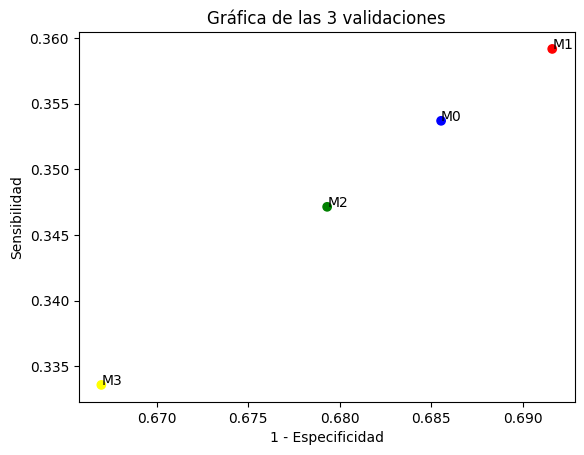

In [106]:
roc_x = [espe0,espe1,espe2,espe3]
roc_y = [sens0,sens1,sens2,sens3]
nombres = ['M0','M1','M2','M3']
colores = ['blue','red', 'green','yellow']

plt.scatter(roc_x, roc_y,c=colores)

for i, nombre in enumerate(nombres):
    plt.annotate(nombre, (roc_x[i], roc_y[i]))

plt.title('Gráfica de las 3 validaciones')
plt.xlabel('1 - Especificidad')
plt.ylabel('Sensibilidad')

plt.show()

In [107]:
# calcular la distancia de cada punto a la esquina superior izquierda donde tendrá la mejor especificidad y sensibilidad
distancias = []
for p in range(0,len(nombres)):
    distancia = math.sqrt((0 - roc_x[p])**2 + (1 - roc_y[p])**2)
    distancias.append(distancia)

# obtener el índice del punto más cercano
indice = distancias.index(min(distancias))

# obtener el punto más cercano
punto_mas_cercano = nombres[indice]

print("El mejor modelo es:", punto_mas_cercano)
print(distancias)

El mejor modelo es: M0
[0.9421671854611122, 0.9428677979716138, 0.9421704778691752, 0.9428450397718062]


### Algoritmo Árboles de decisión

In [108]:
def ArbolesDecision(data_cruzada,caracteristicas,kparticiones):
  sensibilidad = 0
  precision = 0
  especificidad = 0
  # Obtener los valores de entrada (X) y las etiquetas (y) del dataset
  X = data_cruzada.iloc[:, caracteristicas].values
  y = data_cruzada.iloc[:, 0].values

  # Inicializar el objeto KFold con el número de folds (k)
  kf = KFold(n_splits=kparticiones)

  # Listas para almacenar los conjuntos de entrenamiento y prueba
  train_indices = []
  test_indices = []

  # Generar los conjuntos de entrenamiento y prueba usando KFold
  for train_index, test_index in kf.split(X):
      train_indices.append(train_index)
      test_indices.append(test_index)

  # Iterar sobre los k folds
  for fold in range(k):
      print('\nFold ',fold)
      # Obtener los índices de entrenamiento y prueba para el fold actual
      train_index = train_indices[fold]
      test_index = test_indices[fold]

      # Obtener los conjuntos de entrenamiento y prueba para el fold actual
      X_train, y_train = X[train_index], y[train_index]
      X_test, y_test = X[test_index], y[test_index]

      modelo = DecisionTreeClassifier()
      modelo.fit(X_train,y_train)
      y_pred = modelo.predict(X_test)
      matriz = confusion_matrix(y_test,y_pred)
      metricas = desempeno(matriz)
      promedio = metricas['Promedio']
      sensibilidad += promedio[0]
      precision += promedio[1]
      especificidad += promedio[2]
      print(matriz)
      print(metricas)
  return sensibilidad/k, precision/k, especificidad/k

Modelo 1

In [109]:
k = 7
data_cruzada = homogeneidad(data_sin,k)
caracteristicas_2=[14,1,4]
sens,prec,espe = ArbolesDecision(data_cruzada,caracteristicas_2,k)
print('Promedio sensibilidad: ',sens)
print('Promedio precisión: ',prec)
print('Promedio especificidad: ',espe)


Fold  0
              No diabetes  Pre diabetes  Diabetes
No diabetes         12235             0         6
Pre diabetes          168             0         2
Diabetes             1042             0         6
               No diabetes  Pre diabetes  Diabetes  Promedio
Sensibilidad      0.999510           0.0  0.005725  0.335078
Precisión         0.910004           0.0  0.428571  0.446192
Especificidad     0.006568           1.0  0.999355  0.668641

Fold  1
              No diabetes  Pre diabetes  Diabetes
No diabetes         12226             0        15
Pre diabetes          168             0         2
Diabetes             1037             0        11
               No diabetes  Pre diabetes  Diabetes  Promedio
Sensibilidad      0.998775           0.0  0.010496  0.336424
Precisión         0.910282           0.0  0.392857  0.434380
Especificidad     0.010673           1.0  0.998630  0.669768

Fold  2
              No diabetes  Pre diabetes  Diabetes
No diabetes         12228          

In [110]:
k = 9
data_cruzada = homogeneidad(data_sin,k)
sens,prec,espe = ArbolesDecision(data_cruzada,caracteristicas_2,k)
print('Promedio sensibilidad: ',sens)
print('Promedio precisión: ',prec)
print('Promedio especificidad: ',espe)


Fold  0
              No diabetes  Pre diabetes  Diabetes
No diabetes          9514             0         7
Pre diabetes          128             0         4
Diabetes              804             0        11
               No diabetes  Pre diabetes  Diabetes  Promedio
Sensibilidad      0.999265           0.0  0.013497  0.337587
Precisión         0.910779           0.0  0.500000  0.470260
Especificidad     0.015839           1.0  0.998860  0.671567

Fold  1
              No diabetes  Pre diabetes  Diabetes
No diabetes          9511             0         9
Pre diabetes          130             0         2
Diabetes              809             0         7
               No diabetes  Pre diabetes  Diabetes  Promedio
Sensibilidad      0.999055           0.0  0.008578  0.335878
Precisión         0.910144           0.0  0.388889  0.433011
Especificidad     0.009494           1.0  0.998860  0.669451

Fold  2
              No diabetes  Pre diabetes  Diabetes
No diabetes          9508          

In [111]:
k = 11
data_cruzada = homogeneidad(data_sin,k)
sens,prec,espe = ArbolesDecision(data_cruzada,caracteristicas_2,k)
print('Promedio sensibilidad: ',sens)
print('Promedio precisión: ',prec)
print('Promedio especificidad: ',espe)


Fold  0
              No diabetes  Pre diabetes  Diabetes
No diabetes          7786             0         4
Pre diabetes          107             0         1
Diabetes              663             0         4
               No diabetes  Pre diabetes  Diabetes  Promedio
Sensibilidad      0.999487           0.0  0.005997  0.335161
Precisión         0.910005           0.0  0.444444  0.451483
Especificidad     0.006452           1.0  0.999367  0.668606

Fold  1
              No diabetes  Pre diabetes  Diabetes
No diabetes          7781             0         9
Pre diabetes          105             0         3
Diabetes              661             0         6
               No diabetes  Pre diabetes  Diabetes  Promedio
Sensibilidad      0.998845           0.0  0.008996  0.335947
Precisión         0.910378           0.0  0.333333  0.414570
Especificidad     0.011613           1.0  0.998481  0.670031

Fold  2
              No diabetes  Pre diabetes  Diabetes
No diabetes          7782          

Modelo 2

In [112]:
k = 7
data_cruzada = homogeneidad(data_sin,k)
caracteristicas=[14,1,4,19,2,18,5]
sens,prec,espe = ArbolesDecision(data_cruzada,caracteristicas,k)
print('Promedio sensibilidad: ',sens)
print('Promedio precisión: ',prec)
print('Promedio especificidad: ',espe)


Fold  0
              No diabetes  Pre diabetes  Diabetes
No diabetes         12043            24       174
Pre diabetes          157             0        13
Diabetes              958             5        85
               No diabetes  Pre diabetes  Diabetes  Promedio
Sensibilidad      0.983825      0.000000  0.081107  0.354977
Precisión         0.915261      0.000000  0.312500  0.409254
Especificidad     0.084565      0.997818  0.984933  0.689105

Fold  1
              No diabetes  Pre diabetes  Diabetes
No diabetes         11993            26       221
Pre diabetes          156             1        14
Diabetes              960             4        84
               No diabetes  Pre diabetes  Diabetes  Promedio
Sensibilidad      0.979820      0.005848  0.080153  0.355274
Precisión         0.914868      0.032258  0.263323  0.403483
Especificidad     0.084495      0.997742  0.981065  0.687768

Fold  2
              No diabetes  Pre diabetes  Diabetes
No diabetes         12035          

In [113]:
k = 9
data_cruzada = homogeneidad(data_sin,k)
sens,prec,espe = ArbolesDecision(data_cruzada,caracteristicas,k)
print('Promedio sensibilidad: ',sens)
print('Promedio precisión: ',prec)
print('Promedio especificidad: ',espe)


Fold  0
              No diabetes  Pre diabetes  Diabetes
No diabetes          9359            15       147
Pre diabetes          122             0        10
Diabetes              739             3        73
               No diabetes  Pre diabetes  Diabetes  Promedio
Sensibilidad      0.982985      0.000000  0.089571  0.357519
Precisión         0.915753      0.000000  0.317391  0.411048
Especificidad     0.090813      0.998259  0.983736  0.690936

Fold  1
              No diabetes  Pre diabetes  Diabetes
No diabetes          9340            25       155
Pre diabetes          123             1         8
Diabetes              752             4        60
               No diabetes  Pre diabetes  Diabetes  Promedio
Sensibilidad      0.981092      0.007576  0.073529  0.354066
Precisión         0.914342      0.033333  0.269058  0.405578
Especificidad     0.077004      0.997194  0.983112  0.685770

Fold  2
              No diabetes  Pre diabetes  Diabetes
No diabetes          9337          

In [114]:
k = 11
data_cruzada = homogeneidad(data_sin,k)
sens,prec,espe = ArbolesDecision(data_cruzada,caracteristicas,k)
print('Promedio sensibilidad: ',sens)
print('Promedio precisión: ',prec)
print('Promedio especificidad: ',espe)


Fold  0
              No diabetes  Pre diabetes  Diabetes
No diabetes          7651            13       126
Pre diabetes          101             0         7
Diabetes              600             5        62
               No diabetes  Pre diabetes  Diabetes  Promedio
Sensibilidad      0.982157      0.000000  0.092954  0.358370
Precisión         0.916068      0.000000  0.317949  0.411339
Especificidad     0.095484      0.997872  0.983160  0.692172

Fold  1
              No diabetes  Pre diabetes  Diabetes
No diabetes          7659            14       117
Pre diabetes          100             1         7
Diabetes              623             1        43
               No diabetes  Pre diabetes  Diabetes  Promedio
Sensibilidad      0.983184      0.009259  0.064468  0.352304
Precisión         0.913744      0.062500  0.257485  0.411243
Especificidad     0.067097      0.998226  0.984300  0.683208

Fold  2
              No diabetes  Pre diabetes  Diabetes
No diabetes          7637          

Modelo 3

In [115]:
k = 7
data_cruzada = homogeneidad(data_sin,k)
caracteristicas=[14]
sens,prec,espe = ArbolesDecision(data_cruzada,caracteristicas,k)
print('Promedio sensibilidad: ',sens)
print('Promedio precisión: ',prec)
print('Promedio especificidad: ',espe)


Fold  0
              No diabetes  Pre diabetes  Diabetes
No diabetes         12241             0         0
Pre diabetes          170             0         0
Diabetes             1048             0         0
               No diabetes  Pre diabetes  Diabetes  Promedio
Sensibilidad      1.000000           0.0       0.0  0.333333
Precisión         0.909503           0.0       0.0  0.303168
Especificidad     0.000000           1.0       1.0  0.666667

Fold  1
              No diabetes  Pre diabetes  Diabetes
No diabetes         12241             0         0
Pre diabetes          170             0         0
Diabetes             1048             0         0
               No diabetes  Pre diabetes  Diabetes  Promedio
Sensibilidad      1.000000           0.0       0.0  0.333333
Precisión         0.909503           0.0       0.0  0.303168
Especificidad     0.000000           1.0       1.0  0.666667

Fold  2
              No diabetes  Pre diabetes  Diabetes
No diabetes         12241          

In [116]:
k = 9
data_cruzada = homogeneidad(data_sin,k)
sens,prec,espe = ArbolesDecision(data_cruzada,caracteristicas,k)
print('Promedio sensibilidad: ',sens)
print('Promedio precisión: ',prec)
print('Promedio especificidad: ',espe)


Fold  0
              No diabetes  Pre diabetes  Diabetes
No diabetes          9520             0         0
Pre diabetes          132             0         0
Diabetes              816             0         0
               No diabetes  Pre diabetes  Diabetes  Promedio
Sensibilidad      1.000000           0.0       0.0  0.333333
Precisión         0.909438           0.0       0.0  0.303146
Especificidad     0.000000           1.0       1.0  0.666667

Fold  1
              No diabetes  Pre diabetes  Diabetes
No diabetes          9522             0         0
Pre diabetes          132             0         0
Diabetes              814             0         0
               No diabetes  Pre diabetes  Diabetes  Promedio
Sensibilidad      1.000000           0.0       0.0  0.333333
Precisión         0.909629           0.0       0.0  0.303210
Especificidad     0.000000           1.0       1.0  0.666667

Fold  2
              No diabetes  Pre diabetes  Diabetes
No diabetes          9521          

In [117]:
k = 11
data_cruzada = homogeneidad(data_sin,k)
sens,prec,espe = ArbolesDecision(data_cruzada,caracteristicas,k)
print('Promedio sensibilidad: ',sens)
print('Promedio precisión: ',prec)
print('Promedio especificidad: ',espe)


Fold  0
              No diabetes  Pre diabetes  Diabetes
No diabetes          7790             0         0
Pre diabetes          108             0         0
Diabetes              667             0         0
               No diabetes  Pre diabetes  Diabetes  Promedio
Sensibilidad      1.000000           0.0       0.0  0.333333
Precisión         0.909515           0.0       0.0  0.303172
Especificidad     0.000000           1.0       1.0  0.666667

Fold  1
              No diabetes  Pre diabetes  Diabetes
No diabetes          7790             0         0
Pre diabetes          108             0         0
Diabetes              667             0         0
               No diabetes  Pre diabetes  Diabetes  Promedio
Sensibilidad      1.000000           0.0       0.0  0.333333
Precisión         0.909515           0.0       0.0  0.303172
Especificidad     0.000000           1.0       1.0  0.666667

Fold  2
              No diabetes  Pre diabetes  Diabetes
No diabetes          7790          

Modelo 4

In [118]:
k = 7
data_cruzada = homogeneidad(data_sin,k)
caracteristicas=[21,20,9,15]
sens,prec,espe = ArbolesDecision(data_cruzada,caracteristicas,k)
print('Promedio sensibilidad: ',sens)
print('Promedio precisión: ',prec)
print('Promedio especificidad: ',espe)


Fold  0
              No diabetes  Pre diabetes  Diabetes
No diabetes         12236             1         3
Pre diabetes          170             0         0
Diabetes             1049             0         0
               No diabetes  Pre diabetes  Diabetes  Promedio
Sensibilidad      0.999673      0.000000  0.000000  0.333224
Precisión         0.909402      0.000000  0.000000  0.303134
Especificidad     0.000000      0.999925  0.999758  0.666561

Fold  1
              No diabetes  Pre diabetes  Diabetes
No diabetes         12238             0         3
Pre diabetes          170             0         0
Diabetes             1048             0         0
               No diabetes  Pre diabetes  Diabetes  Promedio
Sensibilidad      0.999755           0.0  0.000000  0.333252
Precisión         0.909483           0.0  0.000000  0.303161
Especificidad     0.000000           1.0  0.999758  0.666586

Fold  2
              No diabetes  Pre diabetes  Diabetes
No diabetes         12239          

In [119]:
k = 9
data_cruzada = homogeneidad(data_sin,k)
sens,prec,espe = ArbolesDecision(data_cruzada,caracteristicas,k)
print('Promedio sensibilidad: ',sens)
print('Promedio precisión: ',prec)
print('Promedio especificidad: ',espe)


Fold  0
              No diabetes  Pre diabetes  Diabetes
No diabetes          9517             1         3
Pre diabetes          132             0         0
Diabetes              815             0         0
               No diabetes  Pre diabetes  Diabetes  Promedio
Sensibilidad      0.999580      0.000000  0.000000  0.333193
Precisión         0.909499      0.000000  0.000000  0.303166
Especificidad     0.000000      0.999903  0.999689  0.666531

Fold  1
              No diabetes  Pre diabetes  Diabetes
No diabetes          9518             0         3
Pre diabetes          132             0         0
Diabetes              815             0         0
               No diabetes  Pre diabetes  Diabetes  Promedio
Sensibilidad      0.999685           0.0  0.000000  0.333228
Precisión         0.909508           0.0  0.000000  0.303169
Especificidad     0.000000           1.0  0.999689  0.666563

Fold  2
              No diabetes  Pre diabetes  Diabetes
No diabetes          9520          

In [120]:
k = 11
data_cruzada = homogeneidad(data_sin,k)
sens,prec,espe = ArbolesDecision(data_cruzada,caracteristicas,k)
print('Promedio sensibilidad: ',sens)
print('Promedio precisión: ',prec)
print('Promedio especificidad: ',espe)


Fold  0
              No diabetes  Pre diabetes  Diabetes
No diabetes          7786             1         3
Pre diabetes          108             0         0
Diabetes              667             0         0
               No diabetes  Pre diabetes  Diabetes  Promedio
Sensibilidad      0.999487      0.000000   0.00000  0.333162
Precisión         0.909473      0.000000   0.00000  0.303158
Especificidad     0.000000      0.999882   0.99962  0.666501

Fold  1
              No diabetes  Pre diabetes  Diabetes
No diabetes          7789             0         1
Pre diabetes          108             0         0
Diabetes              667             0         0
               No diabetes  Pre diabetes  Diabetes  Promedio
Sensibilidad      0.999872           0.0  0.000000  0.333291
Precisión         0.909505           0.0  0.000000  0.303168
Especificidad     0.000000           1.0  0.999873  0.666624

Fold  2
              No diabetes  Pre diabetes  Diabetes
No diabetes          7788          

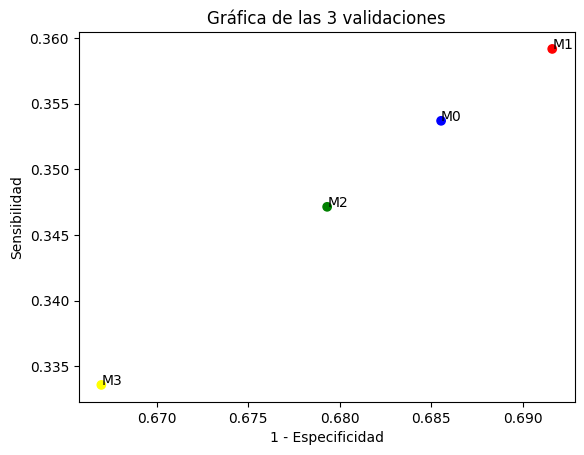

In [121]:
roc_x = [espe0,espe1,espe2,espe3]
roc_y = [sens0,sens1,sens2,sens3]
nombres = ['M0','M1','M2','M3']
colores = ['blue','red', 'green','yellow']

plt.scatter(roc_x, roc_y,c=colores)

for i, nombre in enumerate(nombres):
    plt.annotate(nombre, (roc_x[i], roc_y[i]))

plt.title('Gráfica de las 3 validaciones')
plt.xlabel('1 - Especificidad')
plt.ylabel('Sensibilidad')

plt.show()

In [122]:
# calcular la distancia de cada punto a la esquina superior izquierda donde tendrá la mejor especificidad y sensibilidad
distancias = []
for p in range(0,len(nombres)):
    distancia = math.sqrt((0 - roc_x[p])**2 + (1 - roc_y[p])**2)
    distancias.append(distancia)

# obtener el índice del punto más cercano
indice = distancias.index(min(distancias))

# obtener el punto más cercano
punto_mas_cercano = nombres[indice]

print("El mejor modelo es:", punto_mas_cercano)
print(distancias)

El mejor modelo es: M0
[0.9421671854611122, 0.9428677979716138, 0.9421704778691752, 0.9428450397718062]


### Algoritmo Regresión logística

In [123]:
def RegresionLogistica(data_cruzada,caracteristicas,kparticiones):
  sensibilidad = 0
  precision = 0
  especificidad = 0
  # Obtener los valores de entrada (X) y las etiquetas (y) del dataset
  X = data_cruzada.iloc[:, caracteristicas].values
  y = data_cruzada.iloc[:, 0].values

  # Inicializar el objeto KFold con el número de folds (k)
  kf = KFold(n_splits=kparticiones)

  # Listas para almacenar los conjuntos de entrenamiento y prueba
  train_indices = []
  test_indices = []

  # Generar los conjuntos de entrenamiento y prueba usando KFold
  for train_index, test_index in kf.split(X):
      train_indices.append(train_index)
      test_indices.append(test_index)

  # Iterar sobre los k folds
  for fold in range(k):
      print('\nFold ',fold)
      # Obtener los índices de entrenamiento y prueba para el fold actual
      train_index = train_indices[fold]
      test_index = test_indices[fold]

      # Obtener los conjuntos de entrenamiento y prueba para el fold actual
      X_train, y_train = X[train_index], y[train_index]
      X_test, y_test = X[test_index], y[test_index]

      modelo = LogisticRegression(max_iter = 1000)
      modelo.fit(X_train,y_train)
      y_pred = modelo.predict(X_test)
      matriz = confusion_matrix(y_test,y_pred)
      metricas = desempeno(matriz)
      promedio = metricas['Promedio']
      sensibilidad += promedio[0]
      precision += promedio[1]
      especificidad += promedio[2]
      print(matriz)
      print(metricas)
  return sensibilidad/k, precision/k, especificidad/k


Modelo 1

In [124]:
k = 7
data_cruzada = homogeneidad(data_sin,k)
caracteristicas=[14,1,4]
sens0,prec0,espe0 = RegresionLogistica(data_cruzada,caracteristicas,k)
print('Promedio sensibilidad: ',sens0)
print('Promedio precisión: ',prec0)
print('Promedio especificidad: ',espe0)


Fold  0
              No diabetes  Pre diabetes  Diabetes
No diabetes         12229             0        12
Pre diabetes          166             0         4
Diabetes             1025             0        23
               No diabetes  Pre diabetes  Diabetes  Promedio
Sensibilidad      0.999020           0.0  0.021947  0.340322
Precisión         0.911252           0.0  0.589744  0.500332
Especificidad     0.022167           1.0  0.998711  0.673626

Fold  1
              No diabetes  Pre diabetes  Diabetes
No diabetes         12205             0        36
Pre diabetes          168             0         2
Diabetes             1026             0        22
               No diabetes  Pre diabetes  Diabetes  Promedio
Sensibilidad      0.997059           0.0  0.020992  0.339350
Precisión         0.910889           0.0  0.366667  0.425852
Especificidad     0.019704           1.0  0.996938  0.672214

Fold  2
              No diabetes  Pre diabetes  Diabetes
No diabetes         12216          

In [125]:
k = 9
data_cruzada = homogeneidad(data_sin,k)
sens,prec,espe = RegresionLogistica(data_cruzada,caracteristicas,k)
print('Promedio sensibilidad: ',sens)
print('Promedio precisión: ',prec)
print('Promedio especificidad: ',espe)


Fold  0
              No diabetes  Pre diabetes  Diabetes
No diabetes          9510             0        11
Pre diabetes          128             0         4
Diabetes              795             0        20
               No diabetes  Pre diabetes  Diabetes  Promedio
Sensibilidad      0.998845           0.0  0.024540  0.341128
Precisión         0.911531           0.0  0.571429  0.494320
Especificidad     0.025343           1.0  0.998446  0.674596

Fold  1
              No diabetes  Pre diabetes  Diabetes
No diabetes          9507             0        13
Pre diabetes          131             0         2
Diabetes              803             0        12
               No diabetes  Pre diabetes  Diabetes  Promedio
Sensibilidad      0.998634           0.0  0.014724  0.337786
Precisión         0.910545           0.0  0.444444  0.451663
Especificidad     0.014768           1.0  0.998446  0.671071

Fold  2
              No diabetes  Pre diabetes  Diabetes
No diabetes          9493          

In [126]:
k = 11
data_cruzada = homogeneidad(data_sin,k)
sens,prec,espe = RegresionLogistica(data_cruzada,caracteristicas,k)
print('Promedio sensibilidad: ',sens)
print('Promedio precisión: ',prec)
print('Promedio especificidad: ',espe)


Fold  0
              No diabetes  Pre diabetes  Diabetes
No diabetes          7776             0        14
Pre diabetes          105             0         3
Diabetes              648             0        19
               No diabetes  Pre diabetes  Diabetes  Promedio
Sensibilidad      0.998203           0.0  0.028486  0.342230
Precisión         0.911713           0.0  0.527778  0.479830
Especificidad     0.028387           1.0  0.997848  0.675412

Fold  1
              No diabetes  Pre diabetes  Diabetes
No diabetes          7779             0        10
Pre diabetes          105             0         3
Diabetes              660             0         8
               No diabetes  Pre diabetes  Diabetes  Promedio
Sensibilidad      0.998716           0.0  0.011976  0.336897
Precisión         0.910463           0.0  0.380952  0.430472
Especificidad     0.014175           1.0  0.998354  0.670843

Fold  2
              No diabetes  Pre diabetes  Diabetes
No diabetes          7771          

Modelo 2

In [127]:
k = 7
data_cruzada = homogeneidad(data_sin,k)
caracteristicas_3=[14,1,4,19,2,18,5]
sens1,prec1,espe1 = RegresionLogistica(data_cruzada,caracteristicas_3,k)
print('Promedio sensibilidad: ',sens1)
print('Promedio precisión: ',prec1)
print('Promedio especificidad: ',espe1)


Fold  0
              No diabetes  Pre diabetes  Diabetes
No diabetes         12202             0        39
Pre diabetes          166             0         4
Diabetes             1008             0        40
               No diabetes  Pre diabetes  Diabetes  Promedio
Sensibilidad      0.996814           0.0  0.038168  0.344994
Precisión         0.912231           0.0  0.481928  0.464720
Especificidad     0.036125           1.0  0.996535  0.677553

Fold  1
              No diabetes  Pre diabetes  Diabetes
No diabetes         12168             0        73
Pre diabetes          165             0         5
Diabetes              997             0        51
               No diabetes  Pre diabetes  Diabetes  Promedio
Sensibilidad      0.994036           0.0  0.048664  0.347567
Precisión         0.912828           0.0  0.395349  0.436059
Especificidad     0.045977           1.0  0.993715  0.679897

Fold  2
              No diabetes  Pre diabetes  Diabetes
No diabetes         12189          

In [128]:
k = 9
data_cruzada = homogeneidad(data_sin,k)
sens,prec,espe = RegresionLogistica(data_cruzada,caracteristicas_3,k)
print('Promedio sensibilidad: ',sens)
print('Promedio precisión: ',prec)
print('Promedio especificidad: ',espe)


Fold  0
              No diabetes  Pre diabetes  Diabetes
No diabetes          9487             0        34
Pre diabetes          129             0         3
Diabetes              784             0        31
               No diabetes  Pre diabetes  Diabetes  Promedio
Sensibilidad      0.996429           0.0  0.038037  0.344822
Precisión         0.912212           0.0  0.455882  0.456031
Especificidad     0.035903           1.0  0.996167  0.677357

Fold  1
              No diabetes  Pre diabetes  Diabetes
No diabetes          9477             0        44
Pre diabetes          128             0         4
Diabetes              779             0        36
               No diabetes  Pre diabetes  Diabetes  Promedio
Sensibilidad      0.995379           0.0  0.044172  0.346517
Precisión         0.912654           0.0  0.428571  0.447075
Especificidad     0.042239           1.0  0.995027  0.679089

Fold  2
              No diabetes  Pre diabetes  Diabetes
No diabetes          9475          

In [129]:
k = 11
data_cruzada = homogeneidad(data_sin,k)
sens,prec,espe = RegresionLogistica(data_cruzada,caracteristicas_3,k)
print('Promedio sensibilidad: ',sens)
print('Promedio precisión: ',prec)
print('Promedio especificidad: ',espe)


Fold  0
              No diabetes  Pre diabetes  Diabetes
No diabetes          7755             0        35
Pre diabetes          106             0         2
Diabetes              639             0        28
               No diabetes  Pre diabetes  Diabetes  Promedio
Sensibilidad      0.995507           0.0  0.041979  0.345829
Precisión         0.912353           0.0  0.430769  0.447707
Especificidad     0.038710           1.0  0.995315  0.678008

Fold  1
              No diabetes  Pre diabetes  Diabetes
No diabetes          7766             0        24
Pre diabetes          104             0         4
Diabetes              646             0        21
               No diabetes  Pre diabetes  Diabetes  Promedio
Sensibilidad      0.996919           0.0  0.031484  0.342801
Precisión         0.911930           0.0  0.428571  0.446834
Especificidad     0.032258           1.0  0.996455  0.676238

Fold  2
              No diabetes  Pre diabetes  Diabetes
No diabetes          7748          

Modelo 3

In [130]:
k = 7
data_cruzada = homogeneidad(data_sin,k)
caracteristicas=[14]
sens2,prec2,espe2 = RegresionLogistica(data_cruzada,caracteristicas,k)
print('Promedio sensibilidad: ',sens2)
print('Promedio precisión: ',prec2)
print('Promedio especificidad: ',espe2)


Fold  0
              No diabetes  Pre diabetes  Diabetes
No diabetes         12240             0         0
Pre diabetes          170             0         0
Diabetes             1049             0         0
               No diabetes  Pre diabetes  Diabetes  Promedio
Sensibilidad      1.000000           0.0       0.0  0.333333
Precisión         0.909429           0.0       0.0  0.303143
Especificidad     0.000000           1.0       1.0  0.666667

Fold  1
              No diabetes  Pre diabetes  Diabetes
No diabetes         12241             0         0
Pre diabetes          170             0         0
Diabetes             1048             0         0
               No diabetes  Pre diabetes  Diabetes  Promedio
Sensibilidad      1.000000           0.0       0.0  0.333333
Precisión         0.909503           0.0       0.0  0.303168
Especificidad     0.000000           1.0       1.0  0.666667

Fold  2
              No diabetes  Pre diabetes  Diabetes
No diabetes         12242          

In [131]:
k = 9
data_cruzada = homogeneidad(data_sin,k)
sens,prec,espe = RegresionLogistica(data_cruzada,caracteristicas,k)
print('Promedio sensibilidad: ',sens)
print('Promedio precisión: ',prec)
print('Promedio especificidad: ',espe)


Fold  0
              No diabetes  Pre diabetes  Diabetes
No diabetes          9520             0         0
Pre diabetes          132             0         0
Diabetes              816             0         0
               No diabetes  Pre diabetes  Diabetes  Promedio
Sensibilidad      1.000000           0.0       0.0  0.333333
Precisión         0.909438           0.0       0.0  0.303146
Especificidad     0.000000           1.0       1.0  0.666667

Fold  1
              No diabetes  Pre diabetes  Diabetes
No diabetes          9522             0         0
Pre diabetes          132             0         0
Diabetes              814             0         0
               No diabetes  Pre diabetes  Diabetes  Promedio
Sensibilidad      1.000000           0.0       0.0  0.333333
Precisión         0.909629           0.0       0.0  0.303210
Especificidad     0.000000           1.0       1.0  0.666667

Fold  2
              No diabetes  Pre diabetes  Diabetes
No diabetes          9521          

In [132]:
k = 11
data_cruzada = homogeneidad(data_sin,k)
sens,prec,espe = RegresionLogistica(data_cruzada,caracteristicas,k)
print('Promedio sensibilidad: ',sens)
print('Promedio precisión: ',prec)
print('Promedio especificidad: ',espe)


Fold  0
              No diabetes  Pre diabetes  Diabetes
No diabetes          7790             0         0
Pre diabetes          108             0         0
Diabetes              667             0         0
               No diabetes  Pre diabetes  Diabetes  Promedio
Sensibilidad      1.000000           0.0       0.0  0.333333
Precisión         0.909515           0.0       0.0  0.303172
Especificidad     0.000000           1.0       1.0  0.666667

Fold  1
              No diabetes  Pre diabetes  Diabetes
No diabetes          7790             0         0
Pre diabetes          108             0         0
Diabetes              667             0         0
               No diabetes  Pre diabetes  Diabetes  Promedio
Sensibilidad      1.000000           0.0       0.0  0.333333
Precisión         0.909515           0.0       0.0  0.303172
Especificidad     0.000000           1.0       1.0  0.666667

Fold  2
              No diabetes  Pre diabetes  Diabetes
No diabetes          7790          

Modelo 4

In [133]:
k = 7
data_cruzada = homogeneidad(data_sin,k)
caracteristicas=[21,20,9,15]
sens3,prec3,espe3 = RegresionLogistica(data_cruzada,caracteristicas,k)
print('Promedio sensibilidad: ',sens3)
print('Promedio precisión: ',prec3)
print('Promedio especificidad: ',espe3)


Fold  0
              No diabetes  Pre diabetes  Diabetes
No diabetes         12241             0         0
Pre diabetes          170             0         0
Diabetes             1048             0         0
               No diabetes  Pre diabetes  Diabetes  Promedio
Sensibilidad      1.000000           0.0       0.0  0.333333
Precisión         0.909503           0.0       0.0  0.303168
Especificidad     0.000000           1.0       1.0  0.666667

Fold  1
              No diabetes  Pre diabetes  Diabetes
No diabetes         12240             0         0
Pre diabetes          170             0         0
Diabetes             1049             0         0
               No diabetes  Pre diabetes  Diabetes  Promedio
Sensibilidad      1.000000           0.0       0.0  0.333333
Precisión         0.909429           0.0       0.0  0.303143
Especificidad     0.000000           1.0       1.0  0.666667

Fold  2
              No diabetes  Pre diabetes  Diabetes
No diabetes         12242          

In [134]:
k = 9
data_cruzada = homogeneidad(data_sin,k)
sens,prec,espe = RegresionLogistica(data_cruzada,caracteristicas,k)
print('Promedio sensibilidad: ',sens)
print('Promedio precisión: ',prec)
print('Promedio especificidad: ',espe)


Fold  0
              No diabetes  Pre diabetes  Diabetes
No diabetes          9521             0         0
Pre diabetes          132             0         0
Diabetes              815             0         0
               No diabetes  Pre diabetes  Diabetes  Promedio
Sensibilidad      1.000000           0.0       0.0  0.333333
Precisión         0.909534           0.0       0.0  0.303178
Especificidad     0.000000           1.0       1.0  0.666667

Fold  1
              No diabetes  Pre diabetes  Diabetes
No diabetes          9520             0         0
Pre diabetes          132             0         0
Diabetes              816             0         0
               No diabetes  Pre diabetes  Diabetes  Promedio
Sensibilidad      1.000000           0.0       0.0  0.333333
Precisión         0.909438           0.0       0.0  0.303146
Especificidad     0.000000           1.0       1.0  0.666667

Fold  2
              No diabetes  Pre diabetes  Diabetes
No diabetes          9522          

In [135]:
k = 11
data_cruzada = homogeneidad(data_sin,k)
sens,prec,espe = RegresionLogistica(data_cruzada,caracteristicas,k)
print('Promedio sensibilidad: ',sens)
print('Promedio precisión: ',prec)
print('Promedio especificidad: ',espe)


Fold  0
              No diabetes  Pre diabetes  Diabetes
No diabetes          7789             0         0
Pre diabetes          108             0         0
Diabetes              668             0         0
               No diabetes  Pre diabetes  Diabetes  Promedio
Sensibilidad      1.000000           0.0       0.0  0.333333
Precisión         0.909399           0.0       0.0  0.303133
Especificidad     0.000000           1.0       1.0  0.666667

Fold  1
              No diabetes  Pre diabetes  Diabetes
No diabetes          7791             0         0
Pre diabetes          108             0         0
Diabetes              666             0         0
               No diabetes  Pre diabetes  Diabetes  Promedio
Sensibilidad      1.000000           0.0       0.0  0.333333
Precisión         0.909632           0.0       0.0  0.303211
Especificidad     0.000000           1.0       1.0  0.666667

Fold  2
              No diabetes  Pre diabetes  Diabetes
No diabetes          7790          

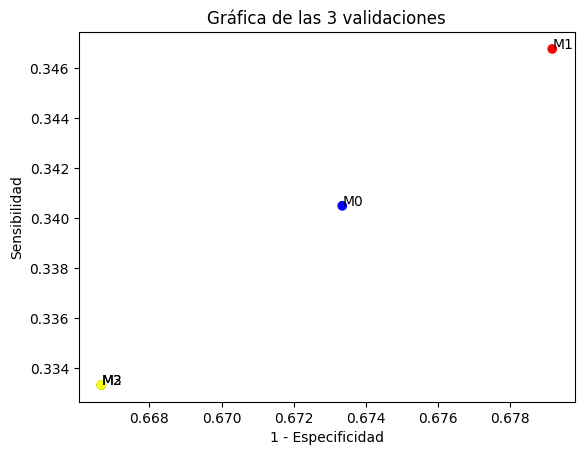

In [136]:
roc_x = [espe0,espe1,espe2,espe3]
roc_y = [sens0,sens1,sens2,sens3]
nombres = ['M0','M1','M2','M3']
colores = ['blue','red', 'green','yellow']

plt.scatter(roc_x, roc_y,c=colores)

for i, nombre in enumerate(nombres):
    plt.annotate(nombre, (roc_x[i], roc_y[i]))

plt.title('Gráfica de las 3 validaciones')
plt.xlabel('1 - Especificidad')
plt.ylabel('Sensibilidad')

plt.show()

In [137]:
# calcular la distancia de cada punto a la esquina superior izquierda donde tendrá la mejor especificidad y sensibilidad
distancias = []
for p in range(0,len(nombres)):
    distancia = math.sqrt((0 - roc_x[p])**2 + (1 - roc_y[p])**2)
    distancias.append(distancia)

# obtener el índice del punto más cercano
indice = distancias.index(min(distancias))

# obtener el punto más cercano
punto_mas_cercano = nombres[indice]

print("El mejor modelo es:", punto_mas_cercano)
print(distancias)

El mejor modelo es: M1
[0.9425158094978983, 0.9423222157686248, 0.9428090415820634, 0.9428090415820634]


## 10. Fusionar por esquema de votación la salida de algoritmos clasificadores, los cuales pueden ser: SVM, Regresión logísitca, Árboles de decisión, KNN y Redes neuronales.

In [160]:
def Fusion(car1, car2, car3, kparticiones):
    caracteristicas = data_sin[columnas[1:]]
    x_train, x_test, y_train, y_test = train_test_split(caracteristicas, data_sin['resultado'], train_size=0.8)

    modelo_knn = KNeighborsClassifier(n_neighbors=kparticiones)
    modelo_knn.fit(x_train.iloc[:, car1], y_train)
    y_pred_knn = modelo_knn.predict(x_test.iloc[:, car1])

    modelo_btree = DecisionTreeClassifier()
    modelo_btree.fit(x_train.iloc[:, car2], y_train)
    y_pred_btree = modelo_btree.predict(x_test.iloc[:, car2])

    modelo_log = LogisticRegression(max_iter = 1000)
    modelo_log.fit(x_train.iloc[:, car3], y_train)
    y_pred_log = modelo_log.predict(x_test.iloc[:, car3])

    # Crear la matriz de votos
    votos = np.vstack((y_pred_knn, y_pred_btree, y_pred_log))
    votos = votos.astype(int)

    # Obtener las predicciones fusionadas mediante votación
    predicciones_fusionadas = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=0, arr=votos)

    # Crear DataFrame con las predicciones de cada modelo
    y_pred_modelos_df = pd.DataFrame(
        np.vstack((y_pred_knn, y_pred_btree, y_pred_log, predicciones_fusionadas)).T,
        columns=['KNN', 'Decision Tree', 'Logistic Regression', 'Fusión']
    )

    return y_pred_modelos_df

In [161]:
Fusion(caracteristicas_1,caracteristicas_2,caracteristicas_3,5)

,KNN,Decision Tree,Logistic Regression,Fusión
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0
...,...,...,...,...
18837,0.0,0.0,0.0,0.0
18838,0.0,0.0,0.0,0.0
18839,0.0,0.0,0.0,0.0
18840,0.0,0.0,0.0,0.0
